In [1]:
import time
start_time = time.time()
import os
HOME = os.environ['HOME']
# os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2/Tes3/Tes4')
os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2/Tes3')                    #2nd epoch
# os.chdir(f'{HOME}/desktop/LTT1445_fits_files/Test/Tes2')                         #1st epoch

In [2]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import mad_std, sigma_clip
import warnings
warnings.filterwarnings("ignore")

import exoplanet as xo

from arctor3 import Arctor, info_message

In [3]:
transit1 = [0,512,300,513]
transit2 = [0,512,178,220]
transit3 = [0,512,150,180]

In [4]:
def instantiate_arctor(planet_name, transit, data_dir, working_dir, file_type):
    planet = Arctor(
        planet_name=planet_name,
        data_dir=data_dir,
        working_dir=working_dir,
        file_type=file_type)

    joblib_filename = f'{planet_name}_savedict.joblib.save'
    joblib_filename = f'{working_dir}/{joblib_filename}'
    if os.path.exists(joblib_filename):
        info_message('Loading Data from Save File')
        planet.load_data(joblib_filename)
    else:
        info_message('Loading New Data Object')
        planet.load_data(transit)

    return planet

def create_raw_lc_stddev(planet):
    ppm = 1e6
    phot_vals = planet.photometry_df
    lc_std_rev = phot_vals.iloc[planet.idx_rev].std(axis=0)                
    lc_std_fwd = phot_vals.iloc[planet.idx_fwd].std(axis=0)                

    lc_med_rev = np.median(phot_vals.iloc[planet.idx_rev], axis=0)
    lc_med_fwd = np.median(phot_vals.iloc[planet.idx_rev], axis=0)

    lc_std = np.mean([lc_std_rev, lc_std_fwd], axis=0)
    lc_med = np.mean([lc_med_rev, lc_med_fwd], axis=0)

    return lc_std / lc_med * ppm

In [5]:
plot_verbose = False
save_now = False
planet_name = 'PlanetName'
file_type = 'flt.fits'

HOME = os.environ['HOME']
# base_dir = os.path.join(HOME, 'path', 'to', 'base')
# data_dir = os.path.join(base_dir, 'path', 'to', 'data')
# data_dir = os.path.join(data_dir, 'HST', 'FLTs')
# working_dir = os.path.join(base_dir, 'path', 'to', 'savefiles')
base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2', 'Tes3')        #2nd epoch
# base_dir = os.path.join(HOME, 'desktop', 'LTT1445_fits_files', 'Test', 'Tes2')                #1st epoch
data_dir = os.path.join(base_dir)
data_dir = os.path.join(data_dir)
working_dir = os.path.join(base_dir)

In [6]:
transit = transit3
planet = instantiate_arctor(planet_name, transit, data_dir, working_dir, file_type)
print(planet)

[INFO] Initializing Instance of the `Arctor` Object
[INFO] Loading New Data Object
[INFO] Loading Fits Files


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 223.91it/s]


[INFO] Creating New Flux/Error/Time Attributes


 10%|████████                                                                            | 9/94 [00:00<00:00, 89.69it/s]

image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)


 20%|████████████████▊                                                                  | 19/94 [00:00<00:00, 92.78it/s]

image_shape (512, 30)


 31%|█████████████████████████▌                                                         | 29/94 [00:00<00:00, 75.06it/s]

image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)


 52%|███████████████████████████████████████████▎                                       | 49/94 [00:00<00:00, 84.25it/s]

image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)


 71%|███████████████████████████████████████████████████████████▏                       | 67/94 [00:00<00:00, 83.52it/s]

image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)


 81%|███████████████████████████████████████████████████████████████████                | 76/94 [00:01<00:00, 67.11it/s]

image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)


 89%|██████████████████████████████████████████████████████████████████████████▏        | 84/94 [00:01<00:00, 51.27it/s]

image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)


100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 67.31it/s]


image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
image_shape (512, 30)
[INFO] Found 94 flt.fits files


In [7]:
planet.clean_cosmic_rays()
planet.calibration_trace_location()
planet.identify_trace_direction()
planet.simple_phots()
planet.center_all_traces()
planet.fit_trace_slopes()
planet.compute_sky_background(subpixels=32)
planet.compute_columnwise_sky_background()

[INFO] Flagging Cosmic Rays using `Temporal Simple` Technique


100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 15.01it/s]


[INFO] Cosmic Ray Mask Creation Took 2.003286361694336 seconds
None
[INFO] Calibration the Median Trace Location
[INFO] Cubic Spline Interpolating the Median Trace Location
[INFO] Calibration the Per Image Trace Location


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 1669.45it/s]


[INFO] Identifying Trace Direction per Image


100%|█████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 2533.43it/s]


[INFO] Computing the Center of the Trace


100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [00:15<00:00,  5.90it/s]


[INFO] Fitting a slope to the Center of the Trace


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 454.61it/s]


In [8]:
# Set up the list of aperture widths and heights to search
min_aper_width = 1
max_aper_width = 100
min_aper_height = 1
max_aper_height = 100

aper_widths = np.arange(min_aper_width, max_aper_width + 2, 5)
aper_heights = np.arange(min_aper_height, max_aper_height + 2, 5)

In [9]:
planet.do_multi_phot(aper_widths, aper_heights)
print("code took", (time.time()-start_time)/60, "minutes")

[INFO] Beginning Multi-Aperture Photometry
[INFO] Creating Apertures


100%|███████████████████████████████████████████████████████████████████████████████████| 94/94 [00:01<00:00, 88.08it/s]

[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image


[INFO] Aperture Photometry per Image took 141.34738063812256 seconds for 41454 apertures.
[INFO] Restructuring Aperture Photometry into DataFrames
    aperture_sum_1x1  aperture_sum_6x1  aperture_sum_11x1  aperture_sum_16x1  \
0       1.418261e+06      1.418261e+06       1.418261e+06       1.418261e+06   
1       1.322386e+06      1.322625e+06       1.322625e+06       1.322625e+06   
2       1.387218e+06      1.387218e+06       1.387218e+06       1.387218e+06   
3       1.334931e+06      1.335048e+06       1.335048e+06       1.335048e+06   
4       1.379005e+06      1.379005e+06       1.379005e+06       1.379005e+06   
..               ...               ...                ...                ...   
89      1.251769e+06      1.251907e+06       1.251907e+06       1.251907e+06   
90      1.337751e+06      1.337751e+06       1.337751e+06       1.337751e+06   
91      1.245495e+06      1.245495e+06       1.245495e+06       1.245495e+06   
92      1.307179e+06      1.307179e+06       1.307179

In [10]:
planet_coarse_photometry_df = planet.photometry_df.copy()
planet.photometry_df


,aperture_sum_1x1,aperture_sum_6x1,aperture_sum_11x1,aperture_sum_16x1,aperture_sum_21x1,aperture_sum_26x1,aperture_sum_31x1,aperture_sum_36x1,aperture_sum_41x1,aperture_sum_46x1,...,aperture_sum_56x101,aperture_sum_61x101,aperture_sum_66x101,aperture_sum_71x101,aperture_sum_76x101,aperture_sum_81x101,aperture_sum_86x101,aperture_sum_91x101,aperture_sum_96x101,aperture_sum_101x101
0,1.418261e+06,1.418261e+06,1.418261e+06,1.418261e+06,1.418261e+06,1.418261e+06,1.418261e+06,1.418261e+06,1.418261e+06,1.418261e+06,...,4.403417e+06,4.403417e+06,4.403417e+06,4.403417e+06,4.403417e+06,4.403417e+06,4.403417e+06,4.403417e+06,4.403417e+06,4.403417e+06
1,1.322386e+06,1.322625e+06,1.322625e+06,1.322625e+06,1.322625e+06,1.322625e+06,1.322625e+06,1.322625e+06,1.322625e+06,1.322625e+06,...,4.391623e+06,4.391623e+06,4.391623e+06,4.391623e+06,4.391623e+06,4.391623e+06,4.391623e+06,4.391623e+06,4.391623e+06,4.391623e+06
2,1.387218e+06,1.387218e+06,1.387218e+06,1.387218e+06,1.387218e+06,1.387218e+06,1.387218e+06,1.387218e+06,1.387218e+06,1.387218e+06,...,4.403947e+06,4.403947e+06,4.403947e+06,4.403947e+06,4.403947e+06,4.403947e+06,4.403947e+06,4.403947e+06,4.403947e+06,4.403947e+06
3,1.334931e+06,1.335048e+06,1.335048e+06,1.335048e+06,1.335048e+06,1.335048e+06,1.335048e+06,1.335048e+06,1.335048e+06,1.335048e+06,...,4.401374e+06,4.401374e+06,4.401374e+06,4.401374e+06,4.401374e+06,4.401374e+06,4.401374e+06,4.401374e+06,4.401374e+06,4.401374e+06
4,1.379005e+06,1.379005e+06,1.379005e+06,1.379005e+06,1.379005e+06,1.379005e+06,1.379005e+06,1.379005e+06,1.379005e+06,1.379005e+06,...,4.386871e+06,4.386871e+06,4.386871e+06,4.386871e+06,4.386871e+06,4.386871e+06,4.386871e+06,4.386871e+06,4.386871e+06,4.386871e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1.251769e+06,1.251907e+06,1.251907e+06,1.251907e+06,1.251907e+06,1.251907e+06,1.251907e+06,1.251907e+06,1.251907e+06,1.251907e+06,...,4.386583e+06,4.386583e+06,4.386583e+06,4.386583e+06,4.386583e+06,4.386583e+06,4.386583e+06,4.386583e+06,4.386583e+06,4.386583e+06
90,1.337751e+06,1.337751e+06,1.337751e+06,1.337751e+06,1.337751e+06,1.337751e+06,1.337751e+06,1.337751e+06,1.337751e+06,1.337751e+06,...,4.394135e+06,4.394135e+06,4.394135e+06,4.394135e+06,4.394135e+06,4.394135e+06,4.394135e+06,4.394135e+06,4.394135e+06,4.394135e+06
91,1.245495e+06,1.245495e+06,1.245495e+06,1.245495e+06,1.245495e+06,1.245495e+06,1.245495e+06,1.245495e+06,1.245495e+06,1.245495e+06,...,4.383132e+06,4.383132e+06,4.383132e+06,4.383132e+06,4.383132e+06,4.383132e+06,4.383132e+06,4.383132e+06,4.383132e+06,4.383132e+06
92,1.307179e+06,1.307179e+06,1.307179e+06,1.307179e+06,1.307179e+06,1.307179e+06,1.307179e+06,1.307179e+06,1.307179e+06,1.307179e+06,...,4.395655e+06,4.395655e+06,4.395655e+06,4.395655e+06,4.395655e+06,4.395655e+06,4.395655e+06,4.395655e+06,4.395655e+06,4.395655e+06


In [11]:
coarse_snr_lightcurves = create_raw_lc_stddev(planet)
coarse_min_snr = coarse_snr_lightcurves[coarse_snr_lightcurves.argmin()]
coarse_min_snr_colname = planet.photometry_df.columns[coarse_snr_lightcurves.argmin()]
coarse_min_snr_col = planet.normed_photometry_df[coarse_min_snr_colname]
coarse_temp = coarse_min_snr_colname.split('_')[-1].split('x')
coarse_min_snr_aper_width, coarse_min_snr_aper_height = np.int32(coarse_temp)

In [12]:
info_message(f'Coarse Aperture Photometry Resulted in {coarse_min_snr:0.0f}ppm with '
             f'{coarse_min_snr_aper_width}x{coarse_min_snr_aper_height} aperture size')

[INFO] Coarse Aperture Photometry Resulted in 2370ppm with 1x101 aperture size


In [13]:
fine_buffer = 10
fine_aper_widths = np.arange(coarse_min_snr_aper_width - fine_buffer,
                             coarse_min_snr_aper_width + fine_buffer)

fine_aper_heights = np.arange(coarse_min_snr_aper_height - fine_buffer,
                              coarse_min_snr_aper_height + fine_buffer)

[-9 -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10] [ 91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110]
1 101


In [14]:
planet.do_multi_phot(fine_aper_widths, fine_aper_heights)

[INFO] Beginning Multi-Aperture Photometry
[INFO] Creating Apertures


100%|██████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<00:00, 105.22it/s]

[INFO] Configuing Photoutils.Aperture_Photometry
[INFO] Computing Aperture Photometry per Image


[INFO] Aperture Photometry per Image took 103.91717100143433 seconds for 37600 apertures.
[INFO] Restructuring Aperture Photometry into DataFrames
    aperture_sum_-9x91  aperture_sum_-8x91  aperture_sum_-7x91  \
0         3.092662e+06        3.237910e+06        3.383165e+06   
1         3.070032e+06        3.217002e+06        3.364025e+06   
2         3.070942e+06        3.218117e+06        3.365407e+06   
3         3.080612e+06        3.227413e+06        3.374137e+06   
4         3.064467e+06        3.210057e+06        3.355763e+06   
..                 ...                 ...                 ...   
89        3.037110e+06        3.185388e+06        3.333950e+06   
90        3.105307e+06        3.249537e+06        3.393765e+06   
91        3.065854e+06        3.212824e+06        3.359826e+06   
92        3.047314e+06        3.195105e+06        3.342977e+06   
93        3.049868e+06        3.195074e+06        3.340481e+06   

    aperture_sum_-6x91  aperture_sum_-5x91  aperture_sum_-4x

[INFO] Adding column aperture_sum_-1x96 to self.photometry_df
[INFO] Adding column aperture_sum_0x96 to self.photometry_df
[INFO] Adding column aperture_sum_2x96 to self.photometry_df
[INFO] Adding column aperture_sum_3x96 to self.photometry_df
[INFO] Adding column aperture_sum_4x96 to self.photometry_df
[INFO] Adding column aperture_sum_5x96 to self.photometry_df
[INFO] Adding column aperture_sum_7x96 to self.photometry_df
[INFO] Adding column aperture_sum_8x96 to self.photometry_df
[INFO] Adding column aperture_sum_9x96 to self.photometry_df
[INFO] Adding column aperture_sum_10x96 to self.photometry_df
[INFO] Adding column aperture_sum_-9x97 to self.photometry_df
[INFO] Adding column aperture_sum_-8x97 to self.photometry_df
[INFO] Adding column aperture_sum_-7x97 to self.photometry_df
[INFO] Adding column aperture_sum_-6x97 to self.photometry_df
[INFO] Adding column aperture_sum_-5x97 to self.photometry_df
[INFO] Adding column aperture_sum_-4x97 to self.photometry_df
[INFO] Adding co

[INFO] Adding column aperture_sum_0x103 to self.photometry_df
[INFO] Adding column aperture_sum_1x103 to self.photometry_df
[INFO] Adding column aperture_sum_2x103 to self.photometry_df
[INFO] Adding column aperture_sum_3x103 to self.photometry_df
[INFO] Adding column aperture_sum_4x103 to self.photometry_df
[INFO] Adding column aperture_sum_5x103 to self.photometry_df
[INFO] Adding column aperture_sum_6x103 to self.photometry_df
[INFO] Adding column aperture_sum_7x103 to self.photometry_df
[INFO] Adding column aperture_sum_8x103 to self.photometry_df
[INFO] Adding column aperture_sum_9x103 to self.photometry_df
[INFO] Adding column aperture_sum_10x103 to self.photometry_df
[INFO] Adding column aperture_sum_-9x104 to self.photometry_df
[INFO] Adding column aperture_sum_-8x104 to self.photometry_df
[INFO] Adding column aperture_sum_-7x104 to self.photometry_df
[INFO] Adding column aperture_sum_-6x104 to self.photometry_df
[INFO] Adding column aperture_sum_-5x104 to self.photometry_df
[I

[INFO] Adding column aperture_sum_-8x110 to self.photometry_df
[INFO] Adding column aperture_sum_-7x110 to self.photometry_df
[INFO] Adding column aperture_sum_-6x110 to self.photometry_df
[INFO] Adding column aperture_sum_-5x110 to self.photometry_df
[INFO] Adding column aperture_sum_-4x110 to self.photometry_df
[INFO] Adding column aperture_sum_-3x110 to self.photometry_df
[INFO] Adding column aperture_sum_-2x110 to self.photometry_df
[INFO] Adding column aperture_sum_-1x110 to self.photometry_df
[INFO] Adding column aperture_sum_0x110 to self.photometry_df
[INFO] Adding column aperture_sum_1x110 to self.photometry_df
[INFO] Adding column aperture_sum_2x110 to self.photometry_df
[INFO] Adding column aperture_sum_3x110 to self.photometry_df
[INFO] Adding column aperture_sum_4x110 to self.photometry_df
[INFO] Adding column aperture_sum_5x110 to self.photometry_df
[INFO] Adding column aperture_sum_6x110 to self.photometry_df
[INFO] Adding column aperture_sum_7x110 to self.photometry_df


In [15]:
planet_fine_photometry_df = planet.photometry_df.copy()

In [16]:
fine_snr_lightcurves = create_raw_lc_stddev(planet)
fine_min_snr = fine_snr_lightcurves[fine_snr_lightcurves.argmin()]
fine_min_snr_colname = planet.photometry_df.columns[fine_snr_lightcurves.argmin()]
fine_min_snr_flux = planet.normed_photometry_df[fine_min_snr_colname]
fine_min_snr_uncs = planet.normed_uncertainty_df[fine_min_snr_colname]
fine_temp = fine_min_snr_colname.split('_')[-1].split('x')
fine_min_snr_aper_width, fine_min_snr_aper_height = np.int32(fine_temp)

In [17]:
info_message(f'Fine Aperture Photometry Resulted in {fine_min_snr:0.0f}ppm with '
             f'{fine_min_snr_aper_width}x{fine_min_snr_aper_height} aperture size; '
             f'with median uncertainties of {np.median(fine_min_snr_uncs)*1e6:0.0f} ppm')

[INFO] Fine Aperture Photometry Resulted in 2333ppm with 0x110 aperture size; with median uncertainties of 481 ppm


In [18]:
data_df = pd.DataFrame()
data_df['flux'] = fine_min_snr_flux.values
data_df['unc'] = fine_min_snr_uncs.values
data_df['times'] = planet.times
idx_fwd = planet.idx_fwd
idx_rev = planet.idx_rev
# data_df.sort_values('times', inplace=True)
# data_df = data_df.reset_index()
# data_df.drop(['index'], axis=1, inplace=True)
data_df

,flux,unc,times
0,1.001525,0.000481,59486.596360
1,1.000676,0.000482,59486.597239
2,1.001626,0.000481,59486.598119
3,1.002874,0.000482,59486.598998
4,0.997647,0.000480,59486.599878
...,...,...,...
89,0.999747,0.000481,59486.750144
90,0.999805,0.000481,59486.751024
91,0.998594,0.000481,59486.751903
92,0.999747,0.000481,59486.752783


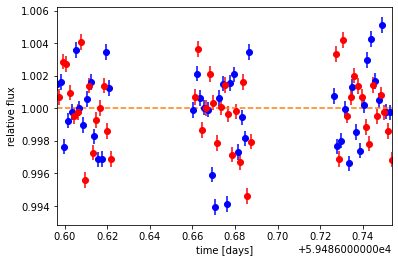

In [19]:
# Compute a limb-darkened light curve using starry
t = data_df['times']
u = []
flux = data_df['flux']
yerr = data_df['unc']
# Note: the `eval` is needed because this is using Theano in
# the background

plt.errorbar(t[idx_fwd], flux[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], flux[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("relative flux")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

In [20]:
fluxppm = (data_df['flux'] - 1)*1e6

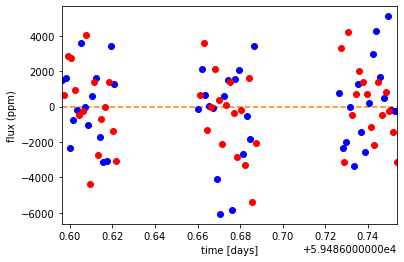

In [21]:
plt.errorbar(t[idx_fwd], fluxppm[idx_fwd], yerr[idx_fwd], fmt='o', color="b")
plt.errorbar(t[idx_rev], fluxppm[idx_rev], yerr[idx_rev], fmt='o', color="r")
plt.axhline(1.0, ls='--', color='C1')
plt.ylabel("flux (ppm)")
plt.xlabel("time [days]")
plt.xlim(t.min(), t.max());

In [ ]:
print("code took", (time.time()-start_time)/60, "minutes")